In [52]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [55]:
df = df.dropna()
df = df.iloc[:-49000]
df = df.drop("sentiment", axis=1)
df


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...
996,I hated it. I hate self-aware pretentious inan...
997,I usually try to be professional and construct...
998,If you like me is going to see this in a film ...


In [56]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Apply cleaning function
df["cleaned_review"] = df["review"].apply(clean_text)

df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [57]:
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment function
df["sentiment_score"] = df["cleaned_review"].apply(get_sentiment)

# Categorize as Positive, Negative, or Neutral
df["sentiment"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

df.head()

,review,cleaned_review,sentiment_score,sentiment
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...,0.025587,Positive
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...,0.127604,Positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,0.264732,Positive
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,0.001389,Positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,0.239534,Positive


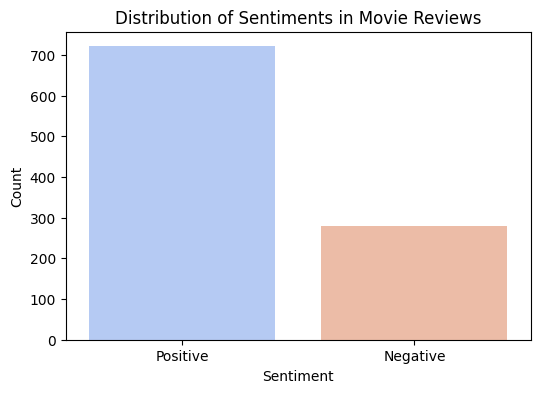

In [58]:
#Visualization part

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["sentiment"], hue= df["sentiment"], palette="coolwarm", legend=False)
plt.title("Distribution of Sentiments in Movie Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
